# Central Limit Theorem (CLT) in Statistics

**Last Updated:** November 6, 2025

One of the most fundamental theorems in statistics and data science.

**Core Idea (very simple version):**
→ No matter what the shape of the population distribution is (skewed, uniform, bimodal, etc.),  
→ **as long as sample size is large enough**,  
→ the **distribution of sample means** will be approximately **Normal**.

**Magic number often quoted:** n ≥ 30 (but depends on how skewed the population is)

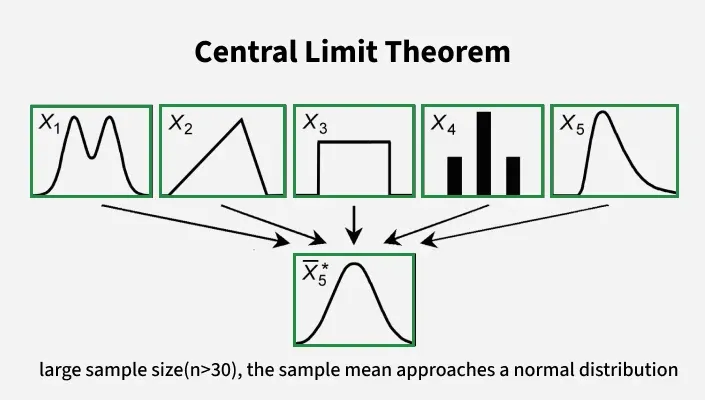

## Central Limit Theorem – Formal Statement

Let X₁, X₂, ..., Xₙ be independent and identically distributed (i.i.d.) random variables with finite mean μ and finite variance σ².

Then the **sample mean**  

X̄ = (X₁ + X₂ + ... + Xₙ) / n

satisfies:

**X̄  ≈  Normal(μ, σ²/n)   when n is large**

Or more precisely:

Zₙ = (X̄ − μ) / (σ / √n)   →   N(0, 1)   as n → ∞

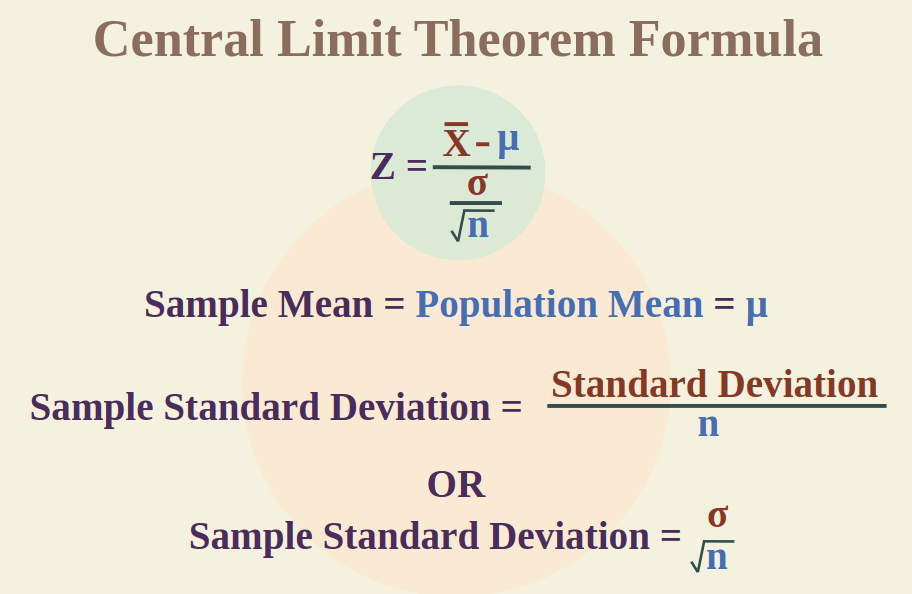

## Key Results from CLT

- Expected value of sample mean:   **E(X̄) = μ**  (same as population)
- Standard deviation of sample mean (**Standard Error**):   **SE = σ / √n**
- Distribution becomes more and more bell-shaped as n increases
- Allows us to use normal-based inference even when population is not normal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100

## Visual Demonstration of CLT

Population mean (μ)    = 1.999
Population std (σ)     = 2.007


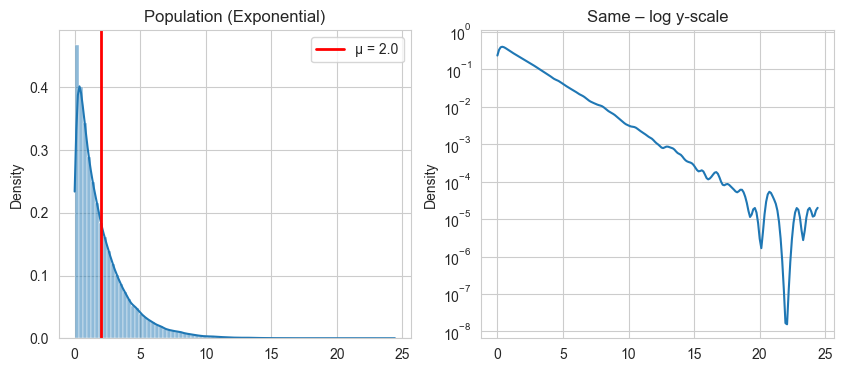

In [3]:
# ─── Choose a very non-normal population ───
# Exponential distribution (strongly right-skewed)

population = np.random.exponential(scale=2.0, size=100_000)
mu = np.mean(population)
sigma = np.std(population, ddof=0)

print(f"Population mean (μ)    = {mu:.3f}")
print(f"Population std (σ)     = {sigma:.3f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(population, bins=80, stat='density', kde=True)
plt.title("Population (Exponential)")
plt.axvline(mu, color='red', lw=2, label=f'μ = {mu:.1f}')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(population, bins=80, stat='density', kde=True, log_scale=(False,True))
plt.title("Same – log y-scale")
plt.show()

In [4]:
def plot_clt_sample_means(sample_size, n_samples=10000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)
    se_theoretical = sigma / np.sqrt(sample_size)

    plt.figure(figsize=(10,5))
    sns.histplot(sample_means, bins=60, stat='density', kde=True, color='teal')

    # Normal curve with same mean & std
    x = np.linspace(sample_means.min(), sample_means.max(), 300)
    y = stats.norm.pdf(x, loc=mu, scale=se_theoretical)
    plt.plot(x, y, 'r--', lw=2.5, label='Theoretical N(μ, σ/√n)')

    plt.title(f'Distribution of Sample Means (n = {sample_size}, {n_samples:,} samples)')
    plt.xlabel('Sample Mean')
    plt.axvline(mu, color='red', lw=2, ls='--', label=f'Population μ = {mu:.2f}')
    plt.legend()
    plt.show()

    print(f"Mean of sample means    = {np.mean(sample_means):.4f}")
    print(f"Std of sample means     = {np.std(sample_means, ddof=1):.4f}")
    print(f"Theoretical SE = σ/√n   = {se_theoretical:.4f}")

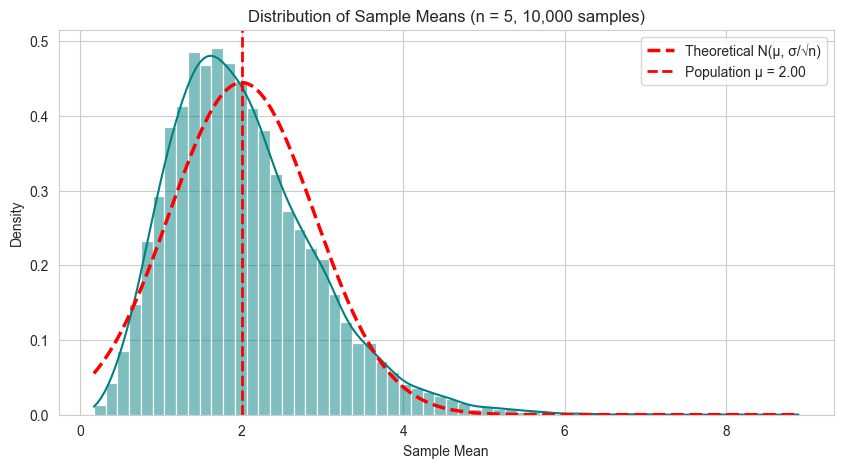

Mean of sample means    = 2.0158
Std of sample means     = 0.9077
Theoretical SE = σ/√n   = 0.8975


In [5]:
# Small sample size
plot_clt_sample_means(sample_size=5)

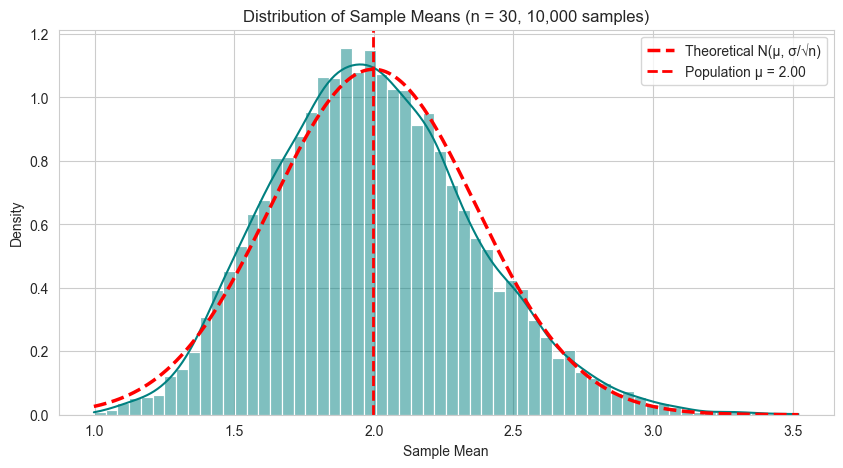

Mean of sample means    = 1.9971
Std of sample means     = 0.3611
Theoretical SE = σ/√n   = 0.3664


In [6]:
# Classic n=30
plot_clt_sample_means(sample_size=30)

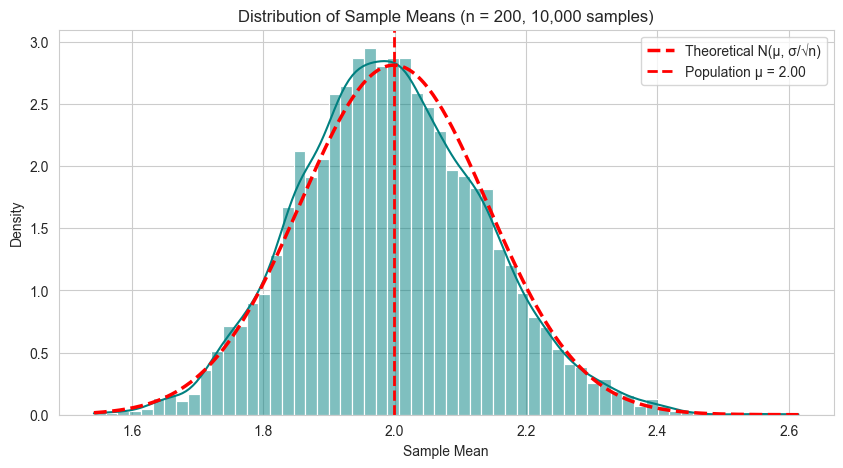

Mean of sample means    = 1.9953
Std of sample means     = 0.1406
Theoretical SE = σ/√n   = 0.1419


In [7]:
# Large sample → very close to normal
plot_clt_sample_means(sample_size=200)

## CLT – Important Formulas

X̄  ∼  N(μ, σ²/n)   approximately (for large n)

Z = (X̄ − μ) / (σ / √n)   →   N(0,1)

Standard Error (SE) = σ / √n

For proportions (when data is 0/1):

SE(p̂) = √[p(1−p)/n]

## Solved Examples

In [8]:
# Example 1
mu = 70
sigma = 15
n = 50

se = sigma / np.sqrt(n)
print(f"Sample mean ≈ {mu}")
print(f"Standard error = {se:.3f} kg")

Sample mean ≈ 70
Standard error = 2.121 kg


In [9]:
# Example 4
mu = 35
sigma = 10
n = 39

se = sigma / np.sqrt(n)
print(f"Standard error ≈ {se:.3f} years")

Standard error ≈ 1.601 years


## Probability Calculation Example

Population: mean = 160 cm, σ = 10 cm  
Sample: n = 25 women  
What is P(X̄ > 162 cm)?

In [10]:
mu = 160
sigma = 10
n = 25

se = sigma / np.sqrt(n)

z = (162 - mu) / se
prob = 1 - stats.norm.cdf(z)

print(f"Z-score = {z:.3f}")
print(f"P(X̄ > 162) ≈ {prob:.4f}")

Z-score = 1.000
P(X̄ > 162) ≈ 0.1587


## Sample Size Calculation (for margin of error)

Margin of error E = $5  
σ = $50  
95% confidence (Z = 1.96)

In [11]:
Z = 1.96
sigma = 50
E = 5

n = (Z * sigma / E)**2
n_needed = np.ceil(n)

print(f"Required sample size = {n_needed:.0f}")

Required sample size = 385


## Quick Summary – When can we use CLT?

✓ Random sample  
✓ Independent observations  
✓ Finite population variance  
✓ Sample size large enough (n ≥ 30 is rule-of-thumb; n ≥ 100 better for skewed data)  
✓ For proportions: np ≥ 5–10 and n(1−p) ≥ 5–10

## Real-world / Computer Science Applications

- A/B testing (conversion rates)  
- Latency / response time averaging  
- Confidence intervals in ML model evaluation  
- Monte Carlo methods  
- Noise in stochastic gradient descent  
- Many hypothesis tests assume normality of means thanks to CLT

**That's it!**  
The Central Limit Theorem is probably the single most useful theorem allowing data scientists and statisticians to make inferences in the real world.